# <font color=Green>Time Series Data</font>

## *Chủ đề: Australian Fatal Road Accident 1989-2021*
***
## Thư viện

In [29]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
import calendar

warnings.filterwarnings("ignore")

# A.THÔNG TIN CHUNG:

## I. Timeline:
- **29/04/2024 - 05/05/2024**: Thu thập dữ liệu, quyết định chọn bộ dữ liệu.
- **06/05/2024 - 12/05/2024**: Khám phá, tiền xử lý dữ liệu.
- **13/05/2024 - 18/05/2024**: Đặt câu hỏi, phân chia công việc.
- **19/05/2024 - 28/05/2024**: Trực quan hóa, trả lời các câu hỏi đã đưa ra.
- **28/05/2024 - 31/05/2024**: Kiểm tra, sửa lỗi và điều chỉnh nếu có.
- **01/06/2024 - 06/06/2024**: Được dời hạn nộp bài, nhóm thực hiện kiểm tra, điều chỉnh một số chi tiết.

## II: Tự đánh giá:


|STT|Tiêu chí|Mức độ hoàn thành(%)|
|---|-----|-------|
|1|Thu thập và tiền xử lý dữ liệu.|5/5|
|2|Chọn lựa, giải thích, trực quan các trường và các mối quan hệ giữa chúng.|50/50|
|3|Rút ra ý nghĩa hợp lý sau mỗi dữ liệu được trực quan.|20/20|
|4|Xem xét trên nhiều quan hệ, nhiều góc nhìn khác nhau.|10/10|
|5|Báo cáo trình bày bố cục và định dạng hợp lý, rõ ràng.|15/15|
|6|Có những phân tích, trực quan hóa bằng những biểu đồ mới lạ và rút ra những thông tin hữu ích (2%).<br>Sử dụng mô hình học máy cơ bản (3%).|0/2<br>0/3|
|7|Hiểu biết tổng thể về mã nguồn đã nộp.|5/5|
|8|Tổng điểm|105

# B. THU THẬP DỮ LIỆU

## I. Ngữ cảnh:
- <b>Động lực:</b> Với mục đích phân tích và đánh giá các yếu tố ảnh hưởng đến tỉ lệ tai nạn khi tham gia giao thông, thông qua đó cung cấp một cơ sở dữ liệu tin cậy để các quốc gia, chính quyền địa phương có thể tham khảo khi đưa ra các quyết định và chiến lược hỗ trợ trong việc cải thiện hiệu quả hơn khi tham giao thông:
    - <b>Cải thiện An toàn Công cộng:</b> Bằng cách phân tích xu hướng các vụ tai nạn chết người, chúng ta có thể xác định các yếu tố chính góp phần gây ra tai nạn và đề xuất các biện pháp hiệu quả để cải thiện an toàn giao thông. Điều này có thể cứu sống nhiều người và giảm bớt gánh nặng kinh tế - xã hội từ các vụ tai nạn giao thông.
    - <b>Xây dựng Chính sách:</b> Qua việc khai thác tập dữ liệu này, em hy vọng có thể khám phá mối tương quan giữa các yếu tố khác nhau khi tham gia giao thông, từ đó đưa ra những khuyến nghị và chiến lược cụ thể nhằm cải thiện hiệu quả trong quá trình tham gia giao thông, đồng thời giúp những người xây dựng chính sách có thể sử dụng những thông tin từ dữ liệu này để thiết kế các quy định an toàn giao thông tốt hơn và triển khai các biện pháp can thiệp mục tiêu. 
    - <b>Nghiên cứu Học thuật:</b> Đối với sinh viên và nhà nghiên cứu, bộ dữ liệu này là nguồn thông tin phong phú để nghiên cứu mối tương quan giữa hành vi con người, công nghệ phương tiện, cơ sở hạ tầng và các biện pháp quản lý trong lĩnh vực an toàn giao thông.
    - Ngoài ra, em muốn cải thiện kỹ năng phân tích dữ liệu của bản thân, trau dồi thêm kiến thức, kỹ năng, kinh nghiệm để ngày càng hoàn thiện hơn.

## II. Chủ đề và tập dữ liệu:
- Chủ đề: Australian Fatal Road Accident 1989-2021
- Nguồn: Kaggle
- Link dataset: [Australian Fatal Road Accident 1989-2021](https://www.kaggle.com/datasets/deepcontractor/australian-fatal-car-accident-data-19892021)
- Tập dữ liệu **Australian Fatal Road Accident 1989-2021** là bộ dữ liệu được thu thập từ trang https://data.gov.au/data/dataset/australian-road-deaths-database.
- Bộ dữ liệu về các vụ tai nạn chết người trên đường bộ tại Úc từ năm 1989 đến 2021 cung cấp cái nhìn tổng quan về xu hướng và mô hình an toàn giao thông đường bộ trong một khoảng thời gian dài. Dữ liệu này rất quan trọng để tìm ra và áp dụng các biện pháp an toàn giao thông, công nghệ phương tiện, cải tiến cơ sở hạ tầng và các chiến dịch nâng cao nhận thức cộng đồng đã ảnh hưởng đến tần suất và mức độ nghiêm trọng của các vụ tai nạn chết người.

# C. TIỀN XỬ LÝ VÀ KHÁM PHÁ DỮ LIỆU

## I. Đọc dữ liệu thô từ file:

In [30]:
# raw_df = pd.read_csv("../Datasets/Crash_Data.csv")
raw_df = pd.read_csv("../Datasets/Crash_Data.csv")

# Test:
raw_df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


## II. Thông tin dòng và cột:

### 1. Số dòng và số cột:

In [31]:
shape = raw_df.shape
print("Số dòng:", raw_df.shape[0])
print("Số cột:", raw_df.shape[1])

Số dòng: 52843
Số cột: 23


### 2. Kiểm tra trùng lặp:

In [32]:
num_duplicated_rows = raw_df.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"Dữ liệu gốc không có dòng trùng lặp")
else:
    print(f"Dữ liệu gốc có {num_duplicated_rows} dòng bị trùng lặp")
    print("Đang xử lý ...")
    raw_df = raw_df.drop_duplicates()
    print(f"Đã xóa những dòng bị trùng lắp")

Dữ liệu gốc có 155 dòng bị trùng lặp
Đang xử lý ...
Đã xóa những dòng bị trùng lắp


### 3. Kiểu dữ liệu của từng cột:

In [33]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52688 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52688 non-null  int64 
 1   State                          52688 non-null  object
 2   Month                          52688 non-null  int64 
 3   Year                           52688 non-null  int64 
 4   Dayweek                        52688 non-null  object
 5   Time                           52648 non-null  object
 6   Crash Type                     52688 non-null  object
 7   Bus Involvement                52666 non-null  object
 8   Heavy Rigid Truck Involvement  32249 non-null  object
 9   Articulated Truck Involvement  52666 non-null  object
 10  Speed Limit                    51990 non-null  object
 11  Road User                      52688 non-null  object
 12  Gender                         52665 non-null  object
 13  Age   

### 4. Kiểm tra, loại bỏ giá trị bị khuyết và chọn dữ liệu phù hợp:

In [34]:
missing_ratio=(raw_df.isnull().sum()/len(raw_df)*100).round(2)
missing_ratio

Crash ID                          0.00
State                             0.00
Month                             0.00
Year                              0.00
Dayweek                           0.00
Time                              0.08
Crash Type                        0.00
Bus Involvement                   0.04
Heavy Rigid Truck Involvement    38.79
Articulated Truck Involvement     0.04
Speed Limit                       1.32
Road User                         0.00
Gender                            0.04
Age                               0.00
National Remoteness Areas        86.97
SA4 Name 2016                    86.95
National LGA Name 2017           86.94
National Road Type               86.97
Christmas Period                  0.00
Easter Period                     0.00
Age Group                         0.15
Day of week                       0.00
Time of day                       0.00
dtype: float64

- Nếu có cột nào có tỉ lệ bị khuyết dữ liệu trên 75% thì loại bỏ

In [35]:
for i in missing_ratio.keys():
    if missing_ratio[i]>75.0:
        raw_df=raw_df.drop(columns=[i])

- Những cột có missing values với tỉ lệ nhỏ, ta điền vào giá trị xuất hiện nhiều nhất hoặc giá trị trung bình

In [36]:
# Fill with the Most Frequent Value
most_frequent_fields = ["Time", "Bus Involvement", "Heavy Rigid Truck Involvement", "Articulated Truck Involvement", "Gender", "Age Group"];
for field in most_frequent_fields:
    most_frequent = raw_df[field].mode()[0]
    raw_df[field].fillna(most_frequent, inplace=True)
# Fill with Mean Value
raw_df['Speed Limit'] = pd.to_numeric(raw_df['Speed Limit'], errors='coerce')
mean_value = round(raw_df['Speed Limit'].mean(), 2)
raw_df['Speed Limit'].fillna(mean_value, inplace=True)
raw_df['Speed Limit'] = raw_df['Speed Limit'].astype('int64')

- Chuyển đổi Time thành Hour

In [37]:
raw_df['Time'] = pd.to_datetime(raw_df['Time'], format='%H:%M').dt.hour

- Do bộ dữ liệu đã chọn gồm thông tin các vụ tại nạn ở Úc, gồm có nhiều bang, nên nhóm sẽ chọn bang NSW để phân tích

In [38]:
# Lọc ra những dòng có cột 'State' là 'NSW'
nsw_df = raw_df[raw_df['State'] == 'NSW']
print("Số dòng:", nsw_df.shape[0])
print("Số cột:", nsw_df.shape[1])

nsw_df.head()

Số dòng: 16243
Số cột: 19


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
13,20211068,NSW,9,2021,Tuesday,21,Single,No,No,No,60,Driver,Female,32,No,No,26_to_39,Weekday,Night
15,20211169,NSW,9,2021,Saturday,8,Single,No,No,No,110,Motorcycle rider,Male,26,No,No,26_to_39,Weekend,Day
18,20211088,NSW,9,2021,Saturday,8,Single,No,No,No,100,Passenger,Female,11,No,No,0_to_16,Weekend,Day
19,20211025,NSW,9,2021,Sunday,10,Single,No,No,No,100,Driver,Male,46,No,No,40_to_64,Weekend,Day
24,20211011,NSW,9,2021,Saturday,6,Single,No,No,No,100,Driver,Male,19,No,No,17_to_25,Weekend,Day


- Ghi bộ dữ liệu đã qua xử lý ra file mới

In [39]:
# nsw_df.to_csv("../Datasets/Crash_Data_Cleaned.csv", index=False)
nsw_df.to_csv("../Datasets/Crash_Data_Cleaned.csv", index=False)

### 6. Ý nghĩa của từng cột: 
- **Crash ID**: Mã vụ tai nạn. (Numerical)

- **State**: Bang. (Categorical)

- **Month**: Tháng. (Categorical)

- **Year**: Năg. (Numerical)

- **Dayweek**: Ngày trong tuần. (Categorical)

- **Time**: Thời gian trong ngày. (Numerical)

- **Crash Type**: Loại va chạm. (Categorical)

- **Bus Involve**: Xe buýt có liên quan đến tai nạn hay không? (Binary)

- **Heavy Rigid Truck Involvement**: Xe tải lớn, container có liên quan đến tai nạn hay không? (Binary)

- **Articulated Truck Involvement**: Xe giỡ hàng có liên quan đến tai nạn hay không? (Binary)

- **Speed Limit**: Tốc độ tối ta. (Numerical)

- **Road User**: Loại người tham gia giao thông. (Categorical)

- **Gender**: Giới tính. (Categorical)

- **Age**: Tuổi. (Numerical)

- **Christmas Period**: Có đang trong Giáng Sinh hay không? (Binary)

- **Easter Period**: Có đang trong Lễ Phục Sinh hay không? (Binary)

- **Age Group**: Nhóm tuổi. (Categorical)

- **Day of week**: Loại ngày trong tuần. (Categorical)

- **Time of Day**: Loại thời gian trong ngày. (Categorical)

# D. Đặt câu hỏi và trực quan hóa

In [40]:
df = pd.read_csv("../Datasets/Crash_Data_Cleaned.csv")

## I. Câu hỏi 1: Sự thay đổi về số lượng tai nạn chết người trên đường bộ tại New South Wales theo thời gian từ năm 1989 đến 2021

### 1. Lợi ích của việc tìm kiếm câu trả lời:

- Phân tích xu hướng thời gian của số lượng tai nạn chết người trên đường bộ tại New South Wales giúp chúng ta hiểu rõ hơn về sự biến động theo thời gian và xác định các yếu tố có thể ảnh hưởng đến sự thay đổi này.
- Việc này có thể giúp nhận biết các giai đoạn có số lượng tai nạn cao và tìm hiểu nguyên nhân, từ đó đề xuất các biện pháp giảm thiểu hiệu quả.
- Ngoài ra, việc phân tích dữ liệu theo thời gian cũng giúp dự báo xu hướng trong tương lai, hỗ trợ các cơ quan chức năng trong việc lập kế hoạch và triển khai các chiến dịch an toàn giao thông.

### 2. Trả lời câu hỏi dựa vào bộ dữ liệu:

#### 2.1 Xu hướng tổng số vụ tai nạn chết người từ 1989 đến 2021?

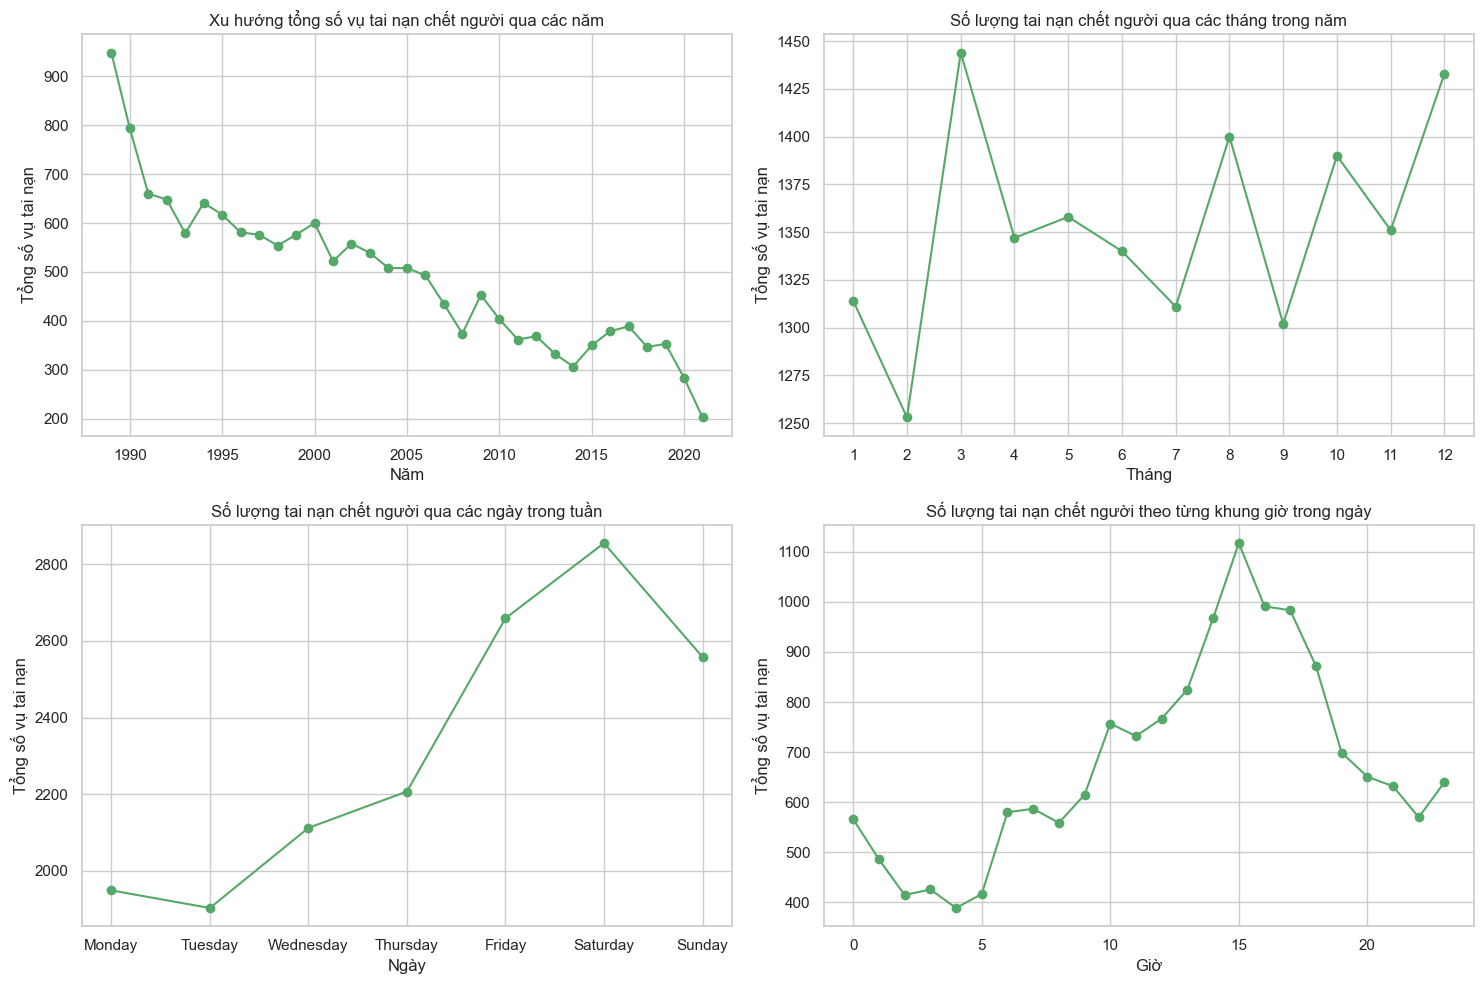

In [41]:
yearly_accidents = df.groupby('Year').size().reset_index(name='Total Accidents')
monthly_accidents = df.groupby('Month').size().reset_index(name='Total Accidents')
dayweek_accidents = df.groupby('Dayweek').size().reset_index(name='Total Accidents')
hour_accidents = df.groupby('Time').size().reset_index(name='Total Accidents')

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(yearly_accidents['Year'], yearly_accidents['Total Accidents'], marker='o', linestyle='-', color='g')
plt.title('Xu hướng tổng số vụ tai nạn chết người qua các năm')
plt.xlabel('Năm')
plt.ylabel('Tổng số vụ tai nạn')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(monthly_accidents['Month'], monthly_accidents['Total Accidents'], marker='o', linestyle='-', color='g')
plt.title('Số lượng tai nạn chết người qua các tháng trong năm')
plt.xlabel('Tháng')
plt.ylabel('Tổng số vụ tai nạn')
plt.xticks(range(1, 13), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.grid(True)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayweek_accidents['Dayweek'] = pd.Categorical(dayweek_accidents['Dayweek'], categories=day_order, ordered=True)

# Sắp xếp dữ liệu theo thứ tự ngày trong tuần
dayweek_accidents = dayweek_accidents.sort_values('Dayweek')

plt.subplot(2, 2, 3)
plt.plot(dayweek_accidents['Dayweek'], dayweek_accidents['Total Accidents'], marker='o', linestyle='-', color='g')
plt.title('Số lượng tai nạn chết người qua các ngày trong tuần')
plt.xlabel('Ngày')
plt.ylabel('Tổng số vụ tai nạn')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(hour_accidents['Time'], hour_accidents['Total Accidents'], marker='o', linestyle='-', color='g')
plt.title('Số lượng tai nạn chết người theo từng khung giờ trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Tổng số vụ tai nạn')
plt.grid(True)

plt.tight_layout()
plt.show()

**Nhận xét**:
<br/>
- Ở hình đầu tiên, tỉ lệ tử vong đã giảm xuống rõ rệt qua các năm. Đường đồ thị bắt đầu từ điểm cao nhất hơn 900 vụ trước năm 1990 và thể hiện xu hướng giảm dần qua các năm, đạt đỉnh thấp nhất vào năm 2021 với khoảng hơn 200 vụ. Bức ảnh này thú vị vì nó cung cấp một hình ảnh minh họa về sự thay đổi tần suất tai nạn chết người theo thời gian. Điều này cho thấy chính quyền đã có các biện pháp xử lý và giải quyết hiệu quả trong việc cải thiện về việc nâng cao nhận thức về an toàn giao thông, cải thiện cơ sở hạ tầng giao thông, và tăng cường kiểm soát tốc độ và an toàn tại các khu vực có mật độ giao thông cao.
-  Hình ảnh thể hiện số lượng tài nạn chết người qua các tháng trong năm. Các điểm quan sát trên biểu đồ cho thấy số lượng tài nạn chết người tăng giảm không đều giữa các tháng. Nhìn chung, số lượng tài nạn chết người dao động khá mạnh giữa các tháng, tăng cao vào một số tháng giữa và cuối năm. Điều này cho thấy cần có các biện pháp tăng cường an toàn giao thông trong những tháng này để giảm thiểu số vụ tài nạn thương tâm.
- Số vụ tai nạn tăng dần từ đầu tuần và đạt đỉnh vào cuối tuần. Tai nạn giao thông chết người có xu hướng tăng vào cuối tuần, đặc biệt là thứ Bảy và Chủ nhật. Điều này đòi hỏi cần tăng cường các biện pháp kiểm soát và nâng cao ý thức người tham gia giao thông vào những ngày cuối tuần để giảm thiểu thương vong.
- Số vụ tai nạn thấp nhất vào khoảng 5 giờ sáng, sau đó tăng dần và đạt đỉnh đầu tiên vào khoảng 10 giờ sáng. Tiếp theo, số vụ tai nạn giảm nhẹ vào buổi trưa rồi lại tăng mạnh vào buổi chiều, đạt mức cao nhất trong ngày vào khoảng 15 giờ. Từ 15 giờ trở đi, số vụ tai nạn giảm dần về cuối ngày nhưng vẫn duy trì ở mức cao hơn so với buổi sáng. Điều này cho thấy cần tăng cường kiểm soát, hướng dẫn giao thông và nâng cao ý thức của người tham gia giao thông vào những khung giờ cao điểm này nhằm hạn chế tối đa các vụ tai nạn đáng tiếc.

#### 2.2 Xu hướng số vụ tai nạn chết người trong các dịp lễ đặc biệt như Giáng Sinh và Phục Sinh?

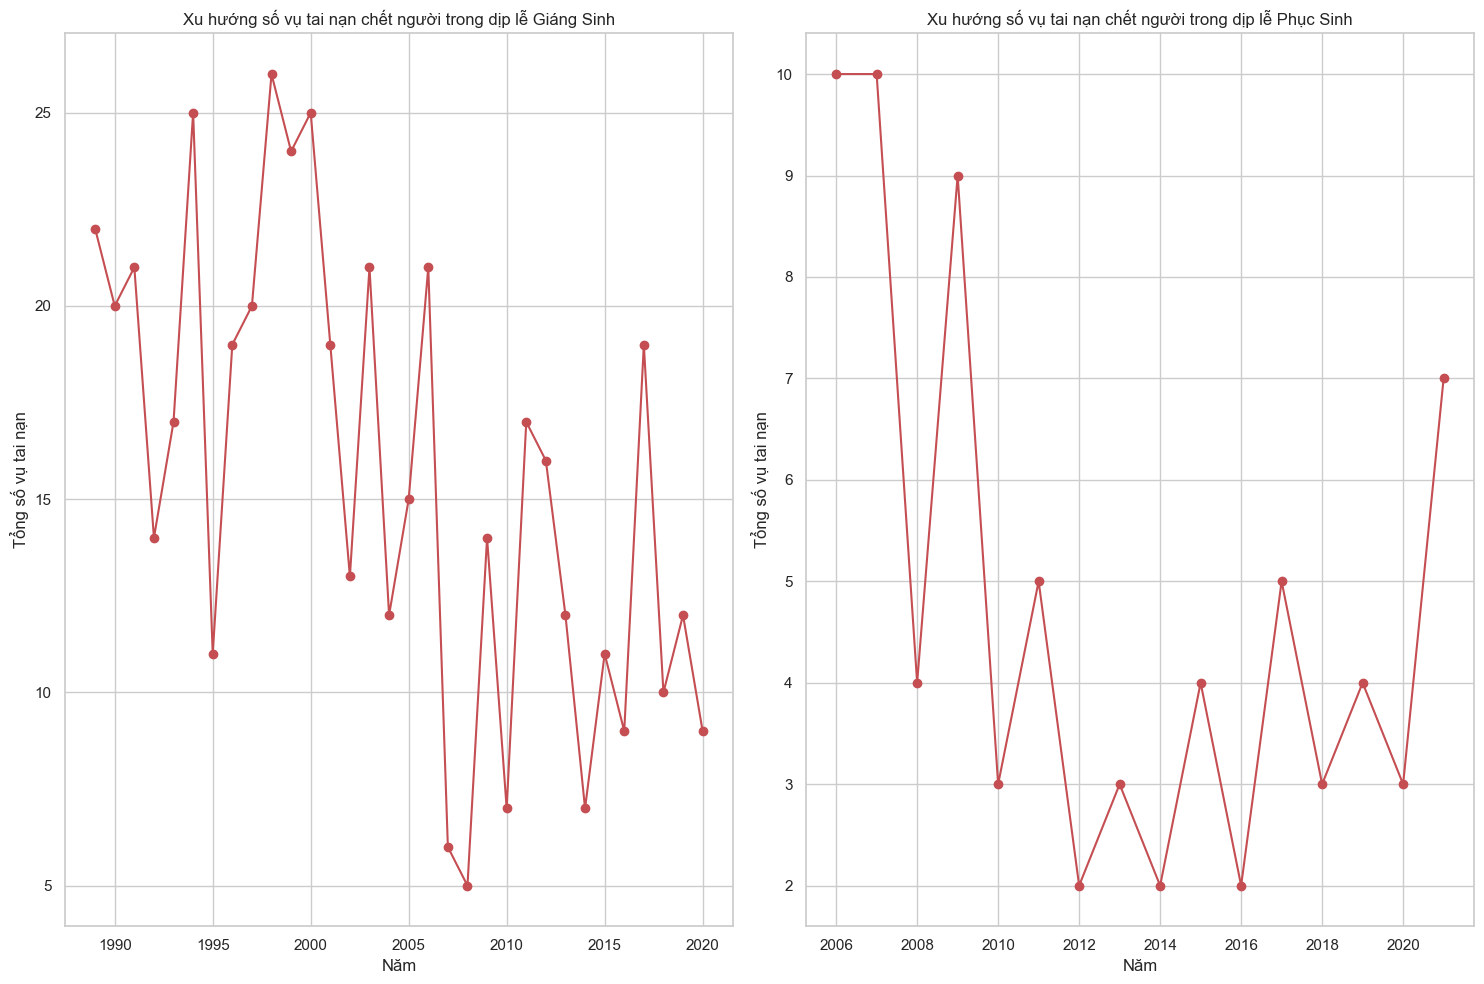

In [42]:
christmas_accidents = df[df['Christmas Period'] == 'Yes'].groupby('Year').size().reset_index(name='Total Accidents')
easter_accidents = df[df['Easter Period'] == 'Yes'].groupby('Year').size().reset_index(name='Total Accidents')

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(christmas_accidents['Year'], christmas_accidents['Total Accidents'], marker='o', linestyle='-', color='r')
plt.title('Xu hướng số vụ tai nạn chết người trong dịp lễ Giáng Sinh')
plt.xlabel('Năm')
plt.ylabel('Tổng số vụ tai nạn')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(easter_accidents['Year'], easter_accidents['Total Accidents'], marker='o', linestyle='-', color='r')
plt.title('Xu hướng số vụ tai nạn chết người trong dịp lễ Phục Sinh')
plt.xlabel('Năm')
plt.ylabel('Tổng số vụ tai nạn')
plt.grid(True)

plt.tight_layout()
plt.show()

**Nhận xét**:
<br/>
- Tỉ lệ tử vong vào mùa giáng sinh cao hơn hẳn so với mùa phục sinh trong suốt khoảng thời gian từ năm 1990 đến 2021. Điều này cho thấy các biện pháp an toàn giao thông vào ngày lễ lớn như Giáng Sinh vẫn cần được chú trọng và cải thiện hơn. Số lượng phương tiện tham gia giao thông cho việc di du lịch của người dân ngày càng nhiều vào mùa Giáng Sinh có thể là một yếu tố đóng góp vào tỷ lệ tai nạn tử vong cao hơn.
- Tỉ lệ tử vong ở mùa Giáng Sinh tăng giảm thất thường qua các năm, cao nhất là vào năm 1998 và thấp nhất vào năm 2008. Trong khi đó, mùa Phục sinh giảm dần nhưng đến năm 2021 lại tăng lên rõ rệt, cao nhất vào năm 2006-2007, thấp nhất vào các năm 2012, 2014 và 2016.
- Sự khác biệt rõ rệt giữa tỷ lệ tử vong mùa Giáng Sinh và Phục Sinh cho thấy cần có các biện pháp đặc biệt để giảm thiểu tai nạn giao thông vào mùa Giáng Sinh. Điều này có thể bao gồm việc nâng cao nhận thức về an toàn giao thông, cải thiện cơ sở hạ tầng giao thông, và tăng cường kiểm soát tốc độ và an toàn tại các khu vực có mật độ giao thông cao.

#### 2.3 Số vụ tai nạn chết người liên quan đến các loại phương tiện khác nhau (ví dụ: ô tô con, xe buýt, xe tải) đã thay đổi như thế nào từ năm 1989 đến năm 2021?

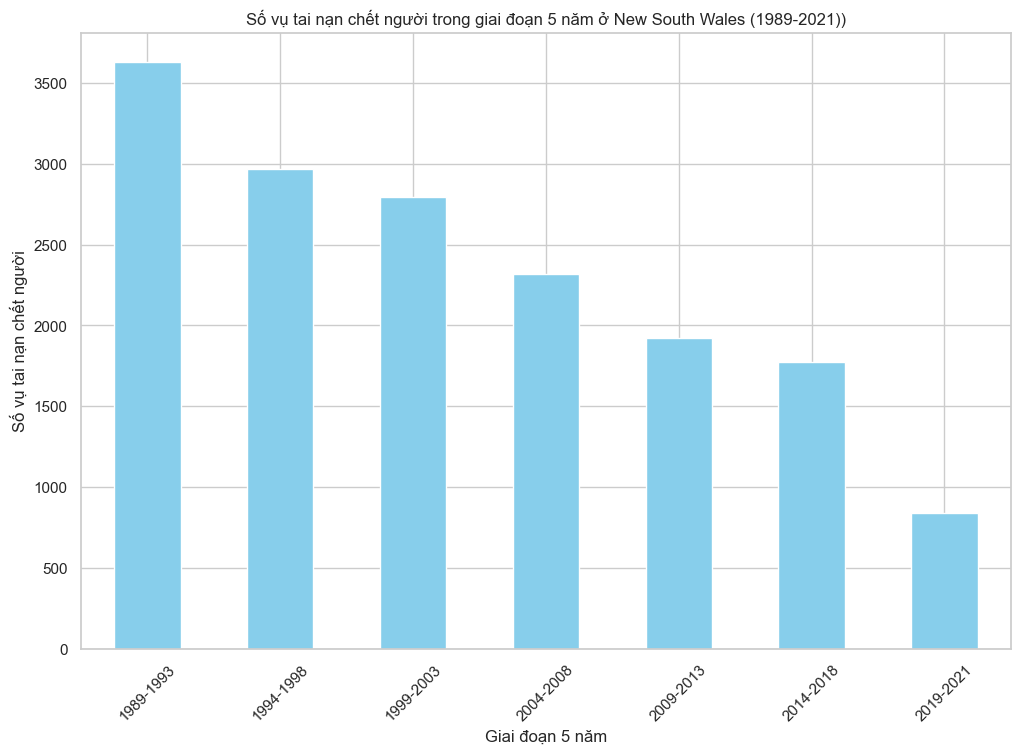

In [43]:
# Filter data for New South Wales
nsw_data = df[df['State'] == 'NSW']

# Define a function to categorize years into 5-year periods
def categorize_period(year):
    if 1989 <= year <= 1993:
        return '1989-1993'
    elif 1994 <= year <= 1998:
        return '1994-1998'
    elif 1999 <= year <= 2003:
        return '1999-2003'
    elif 2004 <= year <= 2008:
        return '2004-2008'
    elif 2009 <= year <= 2013:
        return '2009-2013'
    elif 2014 <= year <= 2018:
        return '2014-2018'
    elif 2019 <= year <= 2021:
        return '2019-2021'
    else:
        return 'Unknown'

# Apply the function to categorize each year
nsw_data['5-Year Period'] = nsw_data['Year'].apply(categorize_period)

# Group the data by the 5-year periods and count the number of fatal accidents
accidents_by_period = nsw_data.groupby('5-Year Period').size()

# Plot the trends
plt.figure(figsize=(12, 8))
accidents_by_period.plot(kind='bar', color='skyblue')

plt.title('Số vụ tai nạn chết người trong giai đoạn 5 năm ở New South Wales (1989-2021))')
plt.xlabel('Giai đoạn 5 năm')
plt.ylabel('Số vụ tai nạn chết người')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Nhận xét**:
<br/>
Nhìn chung, số vụ tai nạn có xu hướng giảm đều qua các giai đoạn 5 năm. Cụ thể:
- Giai đoạn 1989-1993 ghi nhận số vụ tai nạn cao nhất với hơn 3000 vụ.
- Từ 1994 đến 2013, số vụ tai nạn giảm mạnh và liên tục, từ khoảng 2500 vụ xuống chỉ còn xấp xỉ 1800 vụ.
- Trong 2 giai đoạn gần nhất 2014-2018 và 2019-2021, số vụ tai nạn tiếp tục giảm xuống dưới 1000 vụ.
<br/>
<br/>
Như vậy, số vụ tai nạn giao thông gây tử vong ở NSW đã giảm rõ rệt trong hơn 30 năm qua. Điều này cho thấy những nỗ lực của chính quyền và người dân NSW trong việc cải thiện an toàn giao thông, qua đó góp phần giảm thiểu đáng kể các vụ tai nạn thương tâm. Tuy nhiên, vẫn cần tiếp tục nỗ lực hơn nữa để đưa các con số này xuống thấp hơn nữa trong tương lai.

### 3. Kết luận

- **Tai nạn xảy ra nhiều với các ngày nghỉ lễ**: Với sự tăng đáng kể trong tỷ lệ tử vong, tham gia giao thông vào các ngày nghỉ lễ có thể nguy hiểm hơn so với ngày thường.
- **Sáng sớm và tối an toàn hơn buổi trưa chiều**: Đi ra ngoài vào sáng sớm hoặc tối có thể an toàn hơn so với các giờ khác trong ngày.
- **Giảm tỉ lệ tử vong qua các năm**: Tỉ lệ tử vong giảm rõ rệt qua các năm
<br/>
Nhìn chung, thời điểm an toàn nhất để đi ra ngoài là vào ban đêm hoặc sáng sớm, các ngày trong tuần, và tránh xa giờ cao điểm buổi chiều. Tuy nhiên, dù ở thời điểm nào, việc tuân thủ luật giao thông, đảm bảo an toàn cho bản thân và người khác vẫn là yếu tố quan trọng nhất khi tham gia giao thông.

## II. Câu hỏi 2: Thời gian trong ngày và giới hạn tốc độ ảnh hưởng như thế nào đến tần suất và loại va chạm?

### 1. Lợi ích của việc tìm kiếm câu trả lời:

- Hiểu rõ thời điểm và điều kiện nào dễ xảy ra tai nạn sẽ giúp cơ quan chức năng có thể áp dụng các biện pháp phòng ngừa hiệu quả hơn, như tăng cường tuần tra vào những giờ cao điểm tai nạn hoặc điều chỉnh giới hạn tốc độ phù hợp.
- Kết quả nghiên cứu cung cấp cơ sở dữ liệu cho việc xây dựng và điều chỉnh các chính sách, luật lệ giao thông nhằm giảm thiểu tai nạn và bảo đảm an toàn cho người tham gia giao thông.
- Thông tin từ nghiên cứu có thể được sử dụng trong các chiến dịch tuyên truyền và giáo dục cộng đồng về an toàn giao thông, giúp nâng cao nhận thức của người dân về các nguy cơ tiềm ẩn và khuyến khích họ tuân thủ các quy định giao thông.

### 2. Trả lời câu hỏi dựa vào bộ dữ liệu:

#### 2.1 Sự phân bố của các loại va chạm khác nhau trong các thời điểm khác nhau trong ngày là gì?

<Figure size 1200x600 with 0 Axes>

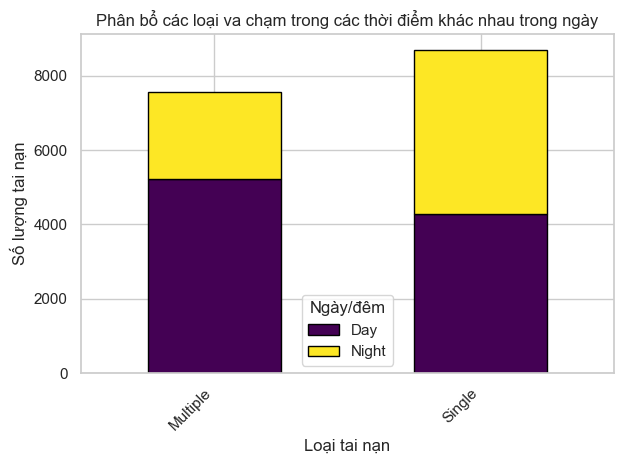

In [55]:
# Grouping the data by Crash Type and Time of day
crash_type_time_of_day = df.groupby(['Crash Type', 'Time of day']).size().reset_index(name='Count')

# Pivoting the data to make it suitable for plotting
crash_type_time_of_day_pivot = crash_type_time_of_day.pivot(index='Crash Type', columns='Time of day', values='Count')

# Plotting the distribution
plt.figure(figsize=(12, 6))
crash_type_time_of_day_pivot.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')

# Adding labels and title
plt.title('Phân bổ các loại va chạm trong các thời điểm khác nhau trong ngày')
plt.xlabel('Loại tai nạn')
plt.ylabel('Số lượng tai nạn')
plt.legend(title='Ngày/đêm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

**Nhận xét**: Bức ảnh này là một biểu đồ cột chồng minh họa sự phân bố của các loại tải nạn (các tai nạn) giữa ngày và đêm tại hai thời điểm khác nhau - Multiple và Single.
<br/>
- Ở cả hai thời điểm, số lượng tai nạn vào ban đêm (màu vàng) đều cao hơn so với ban ngày (màu tím).
- Tại thời điểm Single, tổng số tai nạn là cao hơn so với thời điểm Multiple, cho thấy có nhiều sự kiện tai nạn hơn xảy ra tại thời điểm Single.
- Biểu đồ này cung cấp một cách trực quan để so sánh tần suất tai nạn giữa ngày và đêm cũng như giữa hai thời điểm khác nhau, có thể liên quan đến những thay đổi trong điều kiện giao thông hoặc các yếu tố khác.

#### 2.1 Giới hạn tốc độ có mối tương quan như thế nào với việc xảy ra các loại va chạm khác nhau vào các thời điểm khác nhau trong ngày?

<Figure size 1400x800 with 0 Axes>

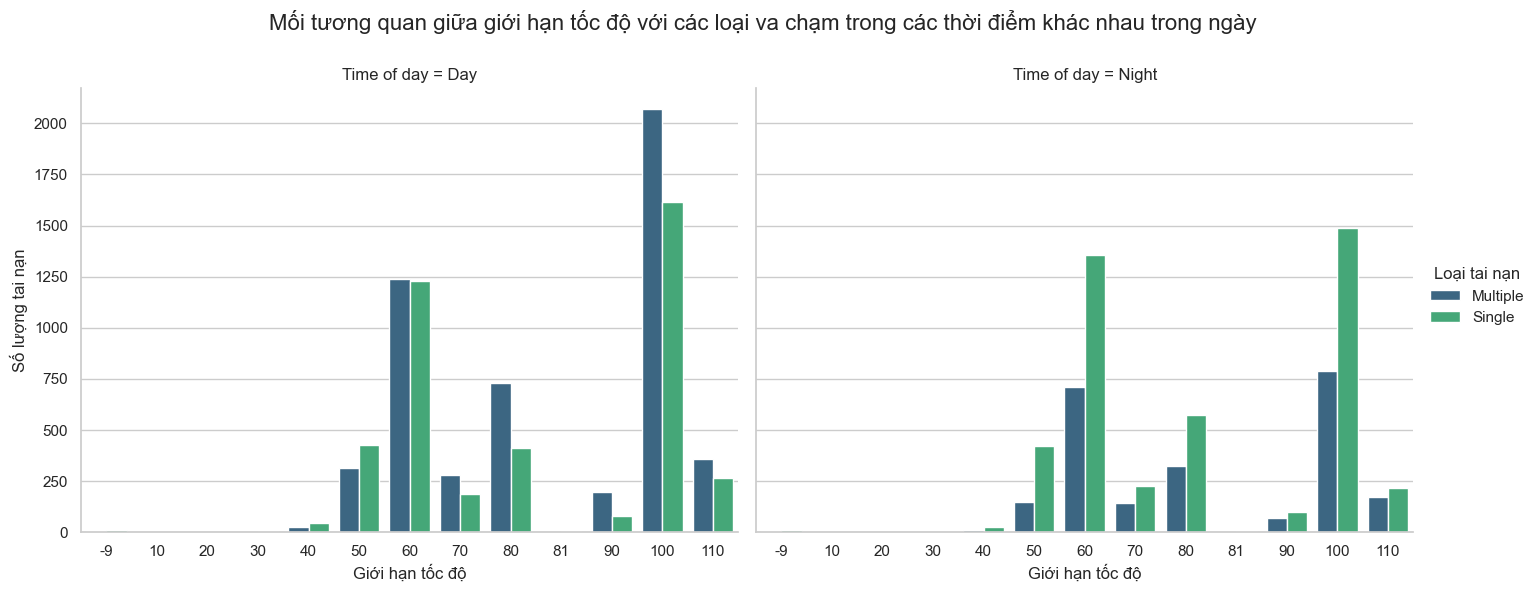

In [57]:
# Grouping the data by Crash Type, Time of day, and Speed Limit
crash_type_speed_time = df.groupby(['Crash Type', 'Time of day', 'Speed Limit']).size().reset_index(name='Count')

# Plotting the distribution
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Creating a FacetGrid to show the relationship between Speed Limit and Crash Type at different times of the day
g = sns.FacetGrid(crash_type_speed_time, col='Time of day', height=6, aspect=1.2)
g.map(sns.barplot, 'Speed Limit', 'Count', 'Crash Type', order=sorted(df['Speed Limit'].unique()), palette='viridis')

# Adding labels and title
g.add_legend(title='Loại tai nạn')
g.set_axis_labels('Giới hạn tốc độ', 'Số lượng tai nạn')
g.fig.suptitle('Mối tương quan giữa giới hạn tốc độ với các loại va chạm trong các thời điểm khác nhau trong ngày', fontsize=16)
g.fig.subplots_adjust(top=0.85)  # Adjusting title position

# Show plot
plt.show()

**Nhận xét**: Bức ảnh này trình bày biểu đồ cột cho thấy mối tương quan giữa giới hạn tốc độ và các loại tai nạn (Multiple hoặc Single) trong ban ngày và ban đêm.
<br/>
Nhìn chung, số vụ tai nạn có xu hướng giảm đều qua các giai đoạn 5 năm. Cụ thể:
- Giai đoạn 1989-1993 ghi nhận số vụ tai nạn cao nhất với hơn 3000 vụ.
- Từ 1994 đến 2013, số vụ tai nạn giảm mạnh và liên tục, từ khoảng 2500 vụ xuống chỉ còn xấp xỉ 1800 vụ.
- Trong 2 giai đoạn gần nhất 2014-2018 và 2019-2021, số vụ tai nạn tiếp tục giảm xuống dưới 1000 vụ.
##### Như vậy, số vụ tai nạn giao thông gây tử vong ở NSW đã giảm rõ rệt trong hơn 30 năm qua. Điều này cho thấy những nỗ lực của chính quyền và người dân NSW trong việc cải thiện an toàn giao thông, qua đó góp phần giảm thiểu đáng kể các vụ tai nạn thương tâm. Tuy nhiên, vẫn cần tiếp tục nỗ lực hơn nữa để đưa các con số này xuống thấp hơn nữa trong tương lai.

#### 2.3 Có những thời điểm cụ thể nào trong ngày mà các vụ va chạm ở giới hạn tốc độ cao hơn xảy ra thường xuyên hơn và những thời điểm này có tương quan với một số loại va chạm nhất định không?

<Figure size 1400x800 with 0 Axes>

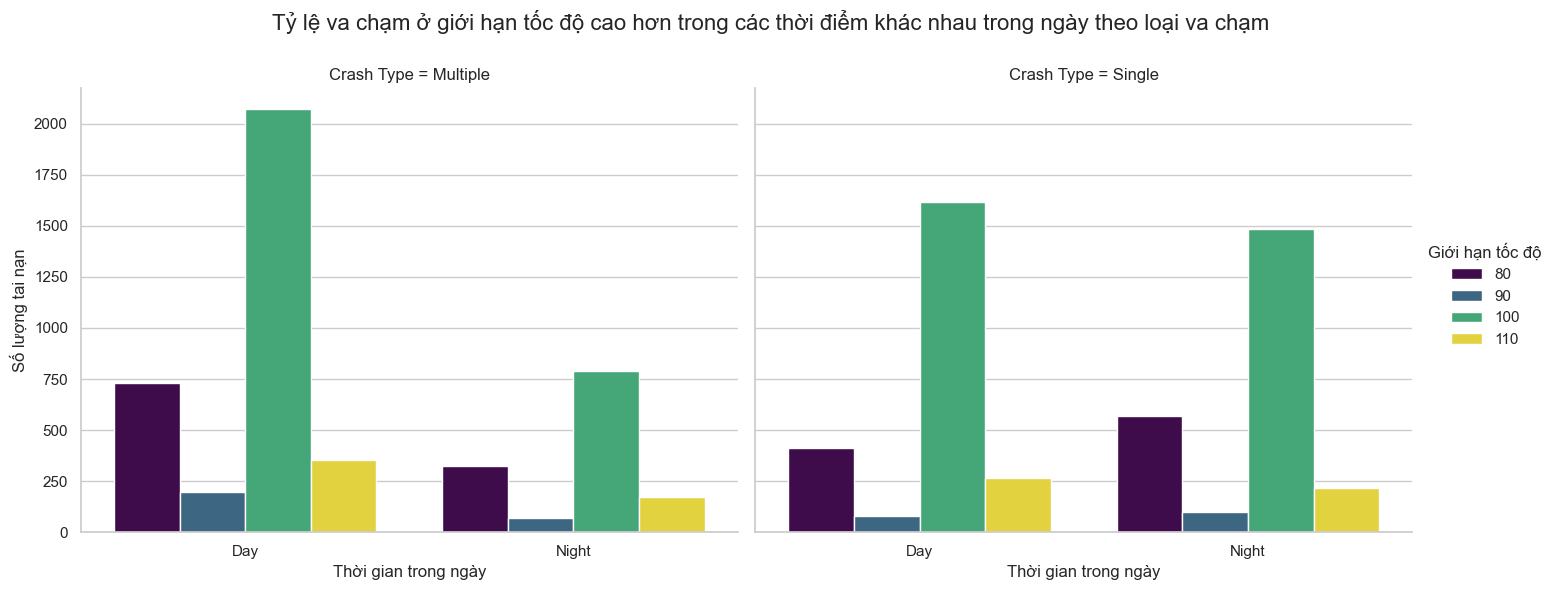

In [58]:
# Define higher speed limits
high_speed_limits = [80, 90, 100, 110]

# Filter data for high speed limits
high_speed_data = df[df['Speed Limit'].isin(high_speed_limits)]

# Grouping the data by Time of day, Crash Type, and Speed Limit
high_speed_crash_time = high_speed_data.groupby(['Time of day', 'Crash Type', 'Speed Limit']).size().reset_index(name='Count')

# Plotting the distribution
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Creating a FacetGrid to show the relationship between Time of day and Crash Type at different high speed limits
g = sns.FacetGrid(high_speed_crash_time, col='Crash Type', height=6, aspect=1.2)
g.map(sns.barplot, 'Time of day', 'Count', 'Speed Limit', order=['Day', 'Night'], palette='viridis')

# Adding labels and title
g.add_legend(title='Giới hạn tốc độ')
g.set_axis_labels('Thời gian trong ngày', 'Số lượng tai nạn')
g.fig.suptitle('Tỷ lệ va chạm ở giới hạn tốc độ cao hơn trong các thời điểm khác nhau trong ngày theo loại va chạm', fontsize=16)
g.fig.subplots_adjust(top=0.85)  # Adjusting title position

# Show plot
plt.show()


**Nhận xét**: Bức ảnh này trình bày biểu đồ cột so sánh tần suất xảy ra các tai nạn loại Multiple và Single tại các giới hạn tốc độ cao khác nhau vào ban ngày và ban đêm.

##### Đối với tai nạn loại Multiple:
- Tần suất cao nhất là vào ban ngày tại giới hạn tốc độ 100.
- Tần suất thấp hơn vào ban đêm tại các giới hạn tốc độ 90 và 110.

##### Đối với tai nạn loại Single:
- Tần suất cao nhất vào cả ban ngày và ban đêm là tại giới hạn tốc độ 100 mph.
- Vào ban ngày, tần suất tai nạn Single khác biệt rõ rệt tại các giới hạn tốc độ khác nhau.
Nhìn chung, biểu đồ cho thấy rằng tai nạn loại Multiple thường xảy ra nhiều hơn vào ban ngày, trong khi tai nạn Single thì có xu hướng xảy ra nhiều hơn vào ban đêm, đặc biệt là tại giới hạn tốc độ cao (mức 100). Điều này có thể liên quan đến các yếu tố như mật độ giao thông, điều kiện ánh sáng và tầm nhìn vào những thời điểm khác nhau trong ngày.

### 3. Kết luận

- **Loại tai nạn**: Loại tai nạn Single xảy ra nhiều hơn so với tai nạn Multiple, đặc biệt là vào thời gian ban đêm. Còn vào ban ngày thì Multiple xảy ra nhiều hơn so với Single.
- **Giới hạn tốc độ**: Tốc độ xảy ra tai nạn thường nằm ở mức 100, còn ở các mức khác thì xảy ra ít hơn hẳn so với mức 100.
<br/>
Nhìn chung, qua những phân tích trên, ta có thể đưa ra những giải pháp phù hợp và kết hợp với chính quyền để có những chính sách nhằm nâng cao ý thức tham gia giao thông sao cho phù hợp, hạn chế tốc độ khi tham gia giao thông và tránh gây tai nạn ảnh hưởng đến những người khác.

## III. Câu hỏi 3: Thời điểm nào là an toàn nhất để đi ra ngoài ?

### 1. Lợi ích của việc tìm kiếm câu trả lời

 Tìm ra khoảng thời gian có nguy cơ xảy ra tai nạn giao thông đường bộ gây tử vong thấp nhất. Việc xác định được thời điểm an toàn này sẽ giúp:
 <br/>
- Người dân có thể lựa chọn thời gian thích hợp để ra ngoài, tránh những khung giờ có nguy cơ mất an toàn giao thông cao, từ đó giảm thiểu rủi ro gặp tai nạn khi tham gia giao thông.
- Các cơ quan chức năng, đặc biệt là cảnh sát giao thông, có thể điều phối lực lượng hợp lý hơn. Họ sẽ tập trung nguồn lực vào những khung giờ có nguy cơ cao để tăng cường tuần tra, kiểm soát và xử lý vi phạm, đồng thời có thể giảm bớt nhân lực trong những thời điểm an toàn hơn.
- Kết quả phân tích có thể được sử dụng trong việc lập kế hoạch và điều chỉnh quy hoạch giao thông, chẳng hạn như điều chỉnh lịch hoạt động của các phương tiện công cộng, tổ chức phân luồng giao thông hợp lý, bố trí hệ thống đèn tín hiệu, biển báo sao cho phù hợp với nhu cầu đi lại của người dân vào từng thời điểm khác nhau.
- Các chiến dịch tuyên truyền nâng cao ý thức an toàn giao thông có thể đề cập đến kết quả nghiên cứu, khuyến cáo người dân nên hạn chế ra ngoài vào những thời điểm có nguy cơ cao, hoặc nếu buộc phải đi thì cần chú trọng hơn đến việc chấp hành luật giao thông để bảo đảm an toàn cho bản thân và những người xung quanh.

### 2. Trả lời câu hỏi dựa vào dataset:

#### 2.1 Xu hướng tỉ lệ tử vong do tai nạn giao thông đường bộ theo thời gian trong ngày (ngày và đêm) qua các năm có sự khác biệt như thế nào?

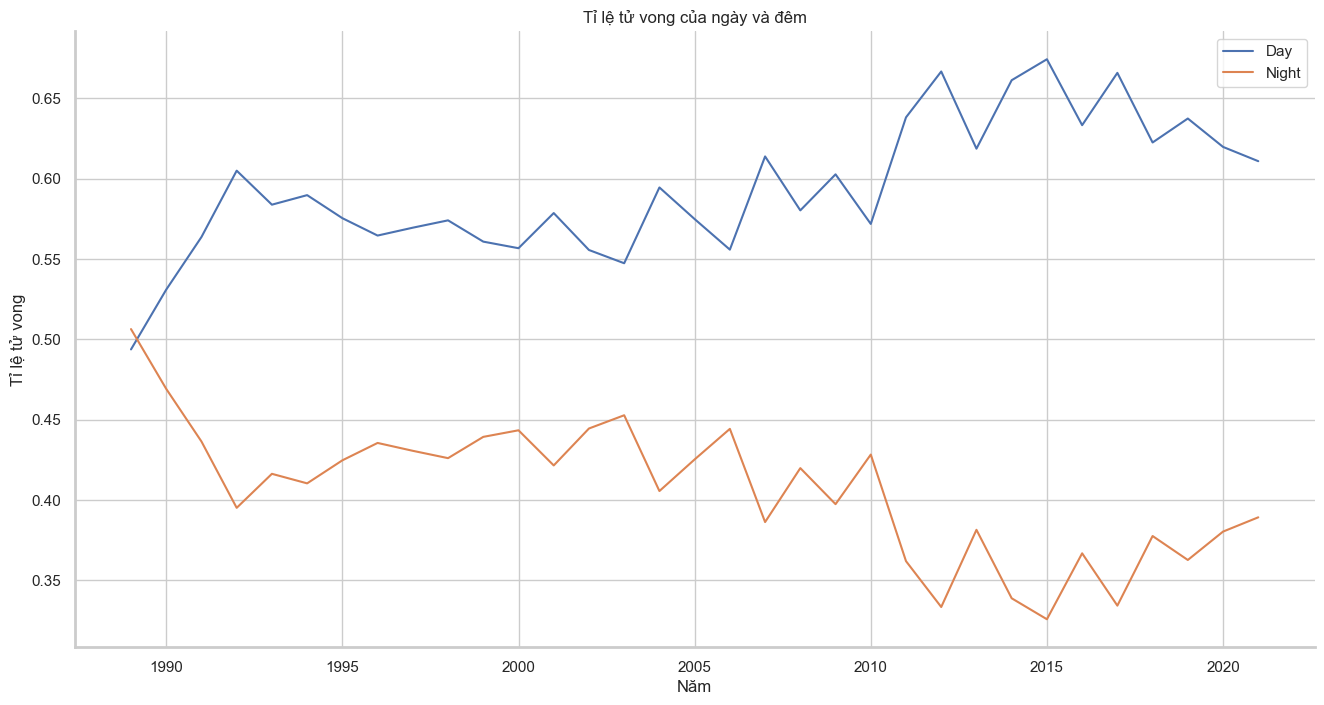

In [47]:
def spines(ax,yl='Tỉ lệ tử vong',xl='Năm'):
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(2)
    x4 = ax.spines['bottom'].set_linewidth(2)
    x5 = ax.set_ylabel(yl)
    x6 = ax.set_xlabel(xl)
    return x1, x2, x3, x4, x5, x6

time_groups = df['Time of day'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(16,8))
n = 0 
for group in time_groups:
    n+=1
    for_plot = df[df['Time of day'] == group].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
    plt.plot(for_plot.index, for_plot.values, label=group)
    plt.title('Tỉ lệ tử vong của ngày và đêm')

    plt.legend()
    spines(ax)
plt.show()

**Nhận xét**:
<br/>
- Tỉ lệ tử vong vào ban ngày luôn cao hơn so với ban đêm trong suốt khoảng thời gian từ năm 1990 đến 2021 (ngoại trừ năm 1989). Điều này cho thấy các biện pháp an toàn giao thông vào ban ngày vẫn cần được chú trọng và cải thiện hơn. Số lượng phương tiện tham gia giao thông ngày càng nhiều vào ban ngày có thể là một yếu tố đóng góp vào tỷ lệ tai nạn tử vong cao hơn.
- Sự khác biệt giữa tỉ lệ tử vong ban ngày và ban đêm trở nên rõ rệt hơn sau năm 2010 khi tỉ lệ ban ngày tăng cao trong khi tỉ lệ ban đêm giảm xuống.
- Sự khác biệt rõ rệt giữa tỷ lệ tử vong ban ngày và ban đêm cho thấy cần có các biện pháp đặc biệt để giảm thiểu tai nạn giao thông vào ban ngày. Điều này có thể bao gồm việc nâng cao nhận thức về an toàn giao thông, cải thiện cơ sở hạ tầng giao thông, và tăng cường kiểm soát tốc độ và an toàn tại các khu vực có mật độ giao thông cao.
- Phân tích sâu hơn về các yếu tố cụ thể như loại phương tiện, điều kiện đường sá, và độ tuổi, giới tính của người lái xe có thể cung cấp thêm thông tin quan trọng để cải thiện an toàn giao thông cả ban ngày và ban đêm.

#### 2.2 Xu hướng tỉ lệ tử vong do tai nạn giao thông đường bộ theo từng ngày trong tuần qua các năm có sự khác biệt như thế nào?

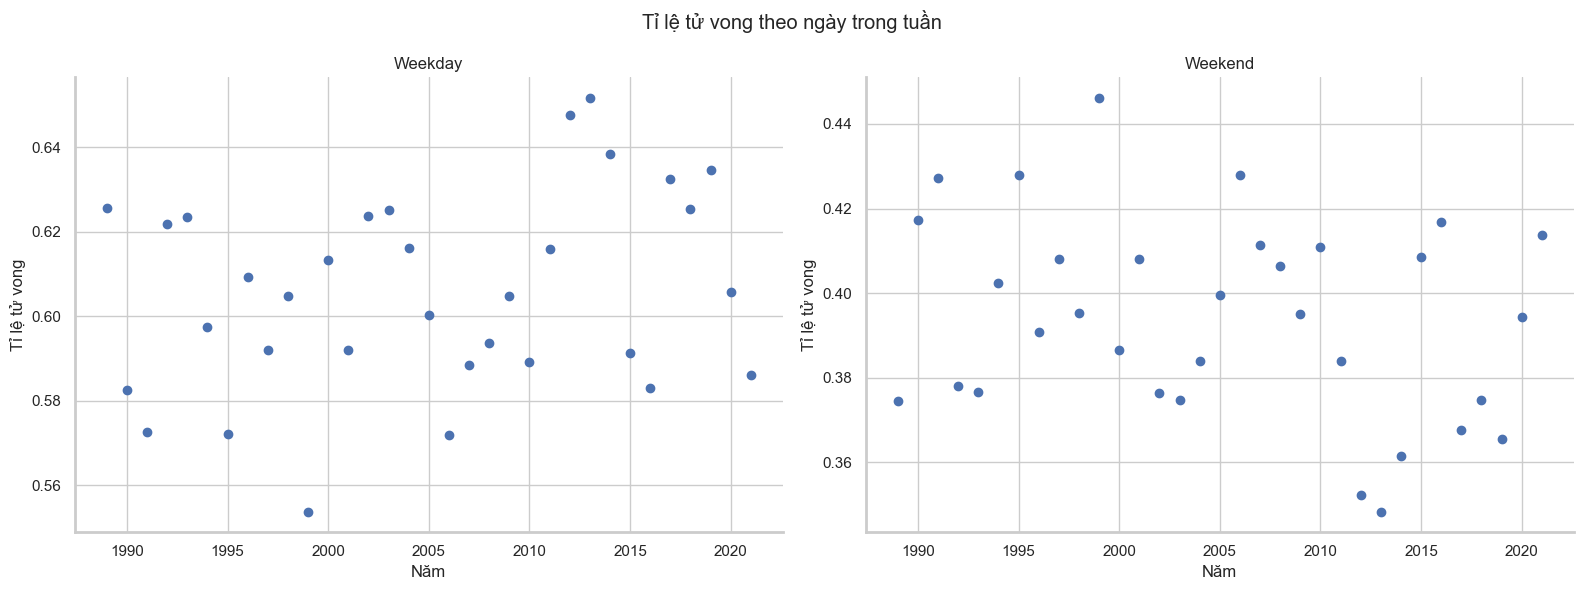

In [48]:
day_groups = df['Day of week'].value_counts().sort_index().index.tolist()

fig, axes = plt.subplots(1, len(day_groups), figsize=(16, 6))
fig.suptitle('Tỉ lệ tử vong theo ngày trong tuần')

for n, group in enumerate(day_groups, start=1):
    for_plot = df[df['Day of week'] == group].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
    axes[n-1].scatter(for_plot.index, for_plot.values)
    axes[n-1].set_title(group)
    spines(axes[n-1])

plt.tight_layout()
plt.show()

**Nhận xét:**
<br/>
- Biểu đồ cho thấy rằng tỷ lệ tử vong do tai nạn giao thông vào các ngày trong tuần luôn cao hơn so với các ngày cuối tuần.
- Điều này có thể là do lưu lượng giao thông vào các ngày trong tuần cao hơn, khi mọi người di chuyển nhiều hơn cho công việc và các hoạt động hàng ngày. Trong khi đó, tỷ lệ tử vong vào cuối tuần tuy thấp hơn nhưng vẫn cho thấy một số biến động qua các năm.
- Các biện pháp an toàn giao thông cần được tiếp tục và tăng cường, đặc biệt vào các ngày trong tuần, để giảm thiểu số vụ tai nạn và tỷ lệ tử vong trên đường bộ tại New South Wales trong tương lai.

#### 2.3 Khác biệt về số lượng tử vong do tai nạn giao thông đường bộ theo giờ trong ngày giữa giai đoạn những năm 90 và từ năm 2011 trở đi như thế nào?

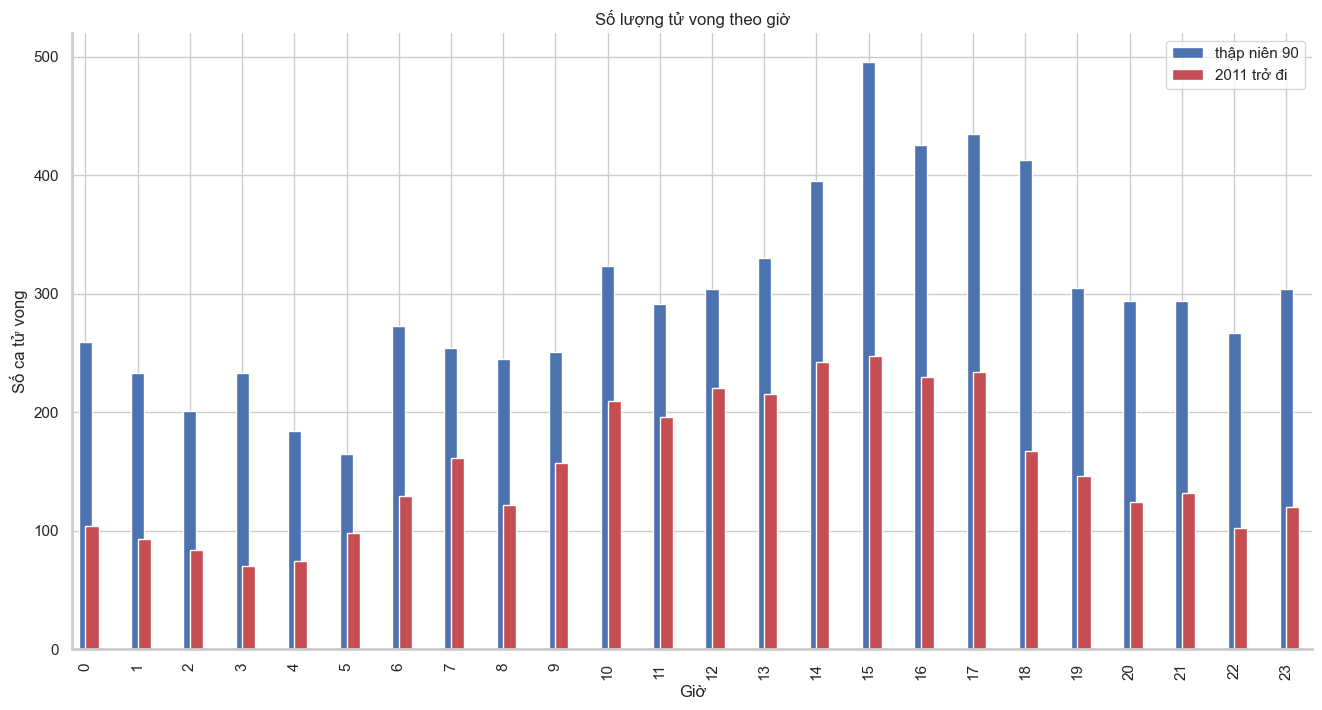

In [49]:
fig, ax = plt.subplots(figsize=(16,8))
df[df['Year'] <= 1999].groupby('Time')['Crash ID'].count().plot.bar(label='thập niên 90', align = 'center', width=0.25)
df[df['Year'] >= 2011].groupby('Time')['Crash ID'].count().plot.bar(label='2011 trở đi', align='edge', color='r', width=0.25)
plt.title('Số lượng tử vong theo giờ')
plt.legend()
spines(ax, xl='Giờ', yl='Số ca tử vong')
plt.show()

**Nhận xét**:
<br/>
- Biểu đồ so sánh số lượng tử vong giữa hai giai đoạn khác nhau (thập niên 90 và từ năm 2011 trở đi) cho thấy sự khác biệt rõ ràng về số lượng tử vong theo giờ trong ngày. Nghĩ một cách tích cực thì hiện tại tỉ lệ tử vong ở giai đoạn sau đã giảm đi nhiều so với những năm 90.
- Giờ cao điểm vào buổi chiều (14h đến 17h chiều, đỉnh điểm là 15h) vẫn là những giờ có số lượng tử vong cao nhất trong cả 2 giai đoạn. Điều này nhấn mạnh sự cần thiết của các biện pháp an toàn đặc biệt vào những thời điểm này.

### 3. Kết luận

- **An toàn hơn vào ban đêm**: Với sự giảm đáng kể trong tỷ lệ tử vong, đi ra ngoài vào ban đêm có thể an toàn hơn so với ban ngày.
- **Cuối tuần an toàn hơn**: Đi ra ngoài vào cuối tuần có thể an toàn hơn so với các ngày trong tuần, do tỷ lệ tử vong vào cuối tuần thường thấp hơn.
- **Giảm nguy cơ vào giờ thấp điểm**: Tránh đi ra ngoài vào các giờ cao điểm (14h đến 17h chiều) có thể giảm thiểu nguy cơ gặp tai nạn giao thông.
<br/>
Nhìn chung, thời điểm an toàn nhất để đi ra ngoài là vào ban đêm, cuối tuần, và tránh xa giờ cao điểm buổi chiều. Tuy nhiên, dù ở thời điểm nào, việc tuân thủ luật giao thông, đảm bảo an toàn cho bản thân và người khác vẫn là yếu tố quan trọng nhất khi tham gia giao thông.

## IV. Câu hỏi 4: Đặc điểm của những người tham gia giao thông bị tai nạn thay đổi như thế nào qua các năm (Tuổi tác, giới tính, loại người tham gia giao thông)?

### 1. Lợi ích của việc tìm kiếm câu trả lời

- **Xác định các nhóm dễ bị tổn thương**: Thông qua phân tích dữ liệu, các nhóm người dễ bị tai nạn như người già, trẻ em, người đi bộ, v.v. sẽ được xác định. Điều này là cơ sở để đề xuất các chính sách và biện pháp can thiệp phù hợp nhằm bảo vệ những nhóm này.
- **Hiểu rõ các nguyên nhân và yếu tố rủi ro**: Thông qua phân tích các yếu tố như tuổi tác, giới tính, hành vi, kinh nghiệm lái xe, v.v. của những người bị tai nạn, ta có thể xác định các yếu tố rủi ro chính dẫn đến tai nạn giao thông. Điều này giúp đề xuất các giải pháp cụ thể để giảm thiểu các yếu tố nguy cơ này.
- **Cải thiện chính sách và chiến lược an toàn giao thông**: Các phát hiện từ phân tích dữ liệu sẽ cung cấp thông tin quan trọng để hoạch định các chính sách, chiến lược và biện pháp can thiệp hiệu quả nhằm nâng cao an toàn giao thông, dữ liệu về đặc điểm của những người bị tai nạn sẽ giúp xác định các nhóm ưu tiên và thiết kế các chương trình can thiệp và giáo dục giao thông phù hợp với từng nhóm đối tượng. Ví dụ, với người lái xe trẻ tuổi, có thể tập trung vào việc tăng cường kỹ năng lái xe an toàn và kiểm soát hành vi.

### 2. Trả lời câu hỏi dựa vào bộ dữ liệu:

#### 2.1. Tỉ lệ tử vong giữa nam và nữ khi tham gia giao thông có sự khác biệt và thay đổi như thế nào qua các năm?

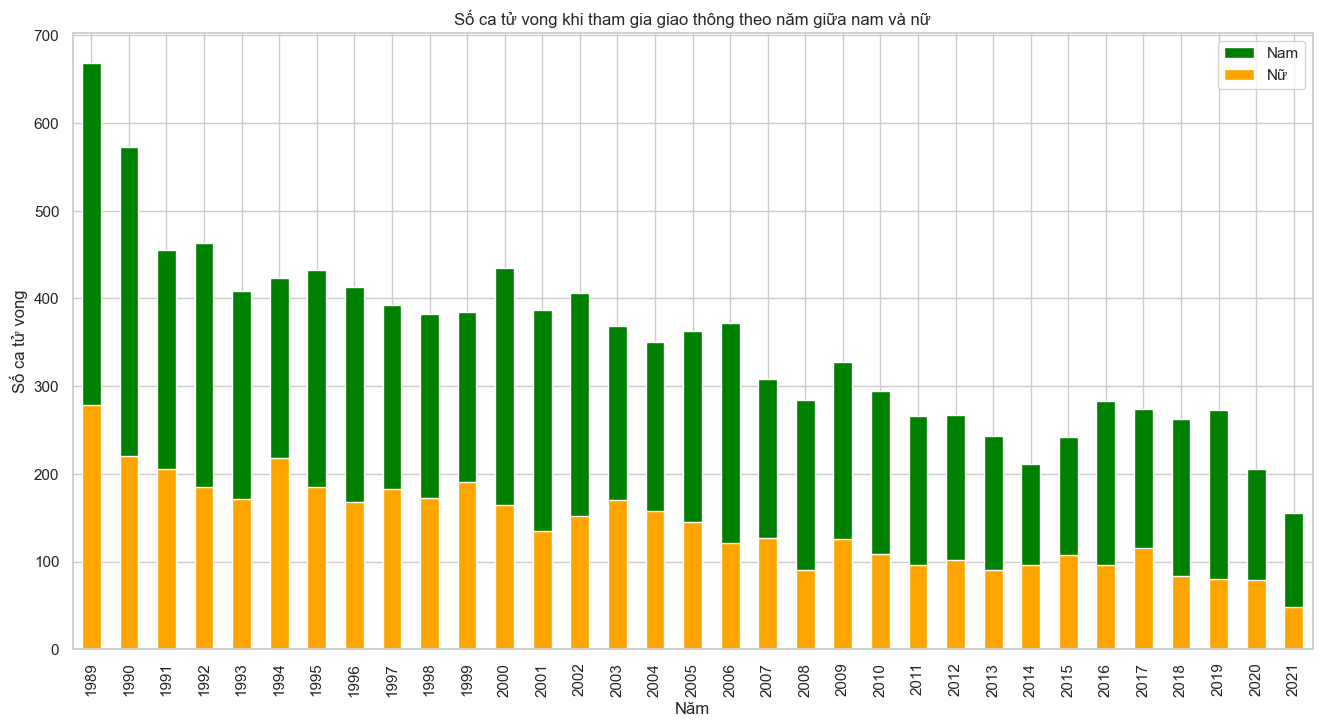

In [50]:
fig, ax = plt.subplots(figsize=(16,8))
df[df['Gender'] == 'Male'].groupby('Year')['Crash ID'].count().plot.bar(label='Nam', align = 'center', color='green', width=0.5)
df[df['Gender'] == 'Female'].groupby('Year')['Crash ID'].count().plot.bar(label='Nữ', align='center', color='orange', width=0.5)
plt.title('Số ca tử vong khi tham gia giao thông theo năm giữa nam và nữ')
plt.legend()
plt.xlabel('Năm')
plt.ylabel('Số ca tử vong')
plt.show()

**Nhận xét**:
<br/>
- Biểu đồ so sánh số ca tử vong giữa nam và nữ cho thấy sự khác biệt rõ ràng về số ca tử vong qua các năm giữa nam và nữ.
- Một điều tích cực ta có thể thấy rằng, số ca tử vong có xu hướng giảm đi từ từ, rõ ràng nhất là số ca tử vong vào năm 2021 chỉ bằng 1/3 so với năm 1989.
- Thông qua biểu đồ ta có thể thấy rằng, số ca tử vong có giới tính là nam luôn cao hơn giới tính nữ, số ca tử vong của nam gấp đôi số ca tử vong của nữ qua mỗi năm, có khi là gấp ba lần.
- Qua biểu đồ tuy ta có thể thấy số ca tử vong của nữ ít hơn nhưng ta vẫn chưa đủ cơ sở để kết luận, nữ sẽ lái xe an toàn hơn nam, có thể là nam tham gia giao thông nhiều hơn nữ, hoặc khi có tai nạn xảy ra, nữ sẽ bị thương nhiều hơn là tử vong, ...

#### 2.2. Tỉ lệ tử vong giữa các nhóm tuổi khi tham gia giao thông có sự khác biệt và thay đổi như thế nào qua các năm?

a. Số ca tử vong khi tham gia giao thông theo năm giữa các nhóm tuổi:

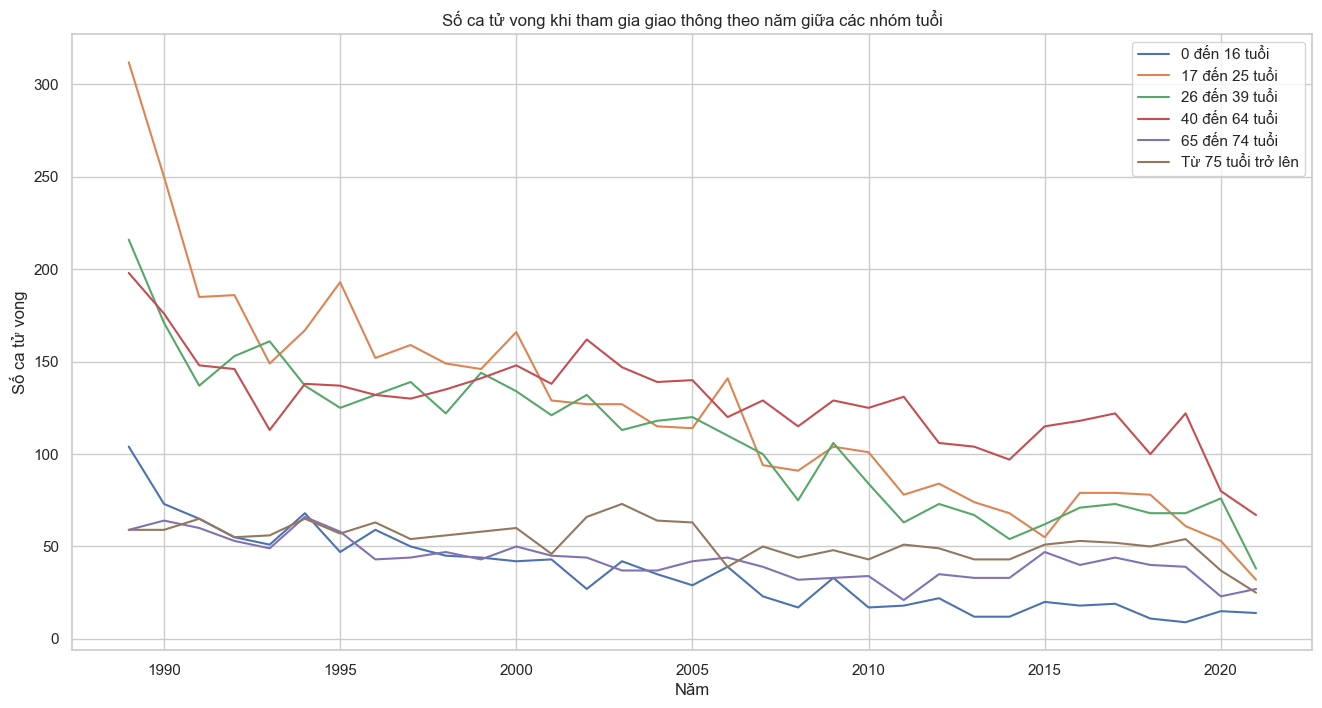

In [51]:
fig, ax = plt.subplots(figsize=(16,8))
df[df['Age Group'] == '0_to_16'].groupby('Year')['Crash ID'].count().plot.line(label='0 đến 16 tuổi')
df[df['Age Group'] == '17_to_25'].groupby('Year')['Crash ID'].count().plot.line(label='17 đến 25 tuổi')
df[df['Age Group'] == '26_to_39'].groupby('Year')['Crash ID'].count().plot.line(label='26 đến 39 tuổi')
df[df['Age Group'] == '40_to_64'].groupby('Year')['Crash ID'].count().plot.line(label='40 đến 64 tuổi')
df[df['Age Group'] == '65_to_74'].groupby('Year')['Crash ID'].count().plot.line(label='65 đến 74 tuổi')
df[df['Age Group'] == '75_or_older'].groupby('Year')['Crash ID'].count().plot.line(label='Từ 75 tuổi trở lên')
plt.title('Số ca tử vong khi tham gia giao thông theo năm giữa các nhóm tuổi')
plt.legend()
plt.xlabel('Năm')
plt.ylabel('Số ca tử vong')
plt.show()

**Nhận xét**:
<br/>
- Biểu đồ so sánh số ca tử vong giữa các nhóm tuổi cho thấy sự khác biệt rõ ràng về số ca tử vong qua các năm giữa 6 nhóm tuổi.
- Một điều đáng buồn là, nhóm tuổi từ **0 đến 16 tuổi** và **từ 75 tuổi trở lên**, nhóm tuổi gồm trẻ nhỏ và người lớn tuổi, có số ca tử vong khá cao, nhưng cũng đã có xu hướng giảm qua các năm.
- Ba nhóm tuổi **17 đến 25 tuổi**, **26 đến 39 tuổi** và **40 đến 64 tuổi** là những nhóm tuổi có số ca tử vong cao nhất.
    - Trước năm 2000, nhóm tuổi **từ 17 đến 25 tuổi** có số ca tử vong cao nhất, đỉnh điểm là vào năm 1989.
    - Sau năm 2000, nhóm tuổi **từ 40 đến 64 tuổi** có số ca tử vong cao nhất.

b. Số ca tử vong của nhóm tuổi **từ 17 đến 64 tuổi** của **nam**:

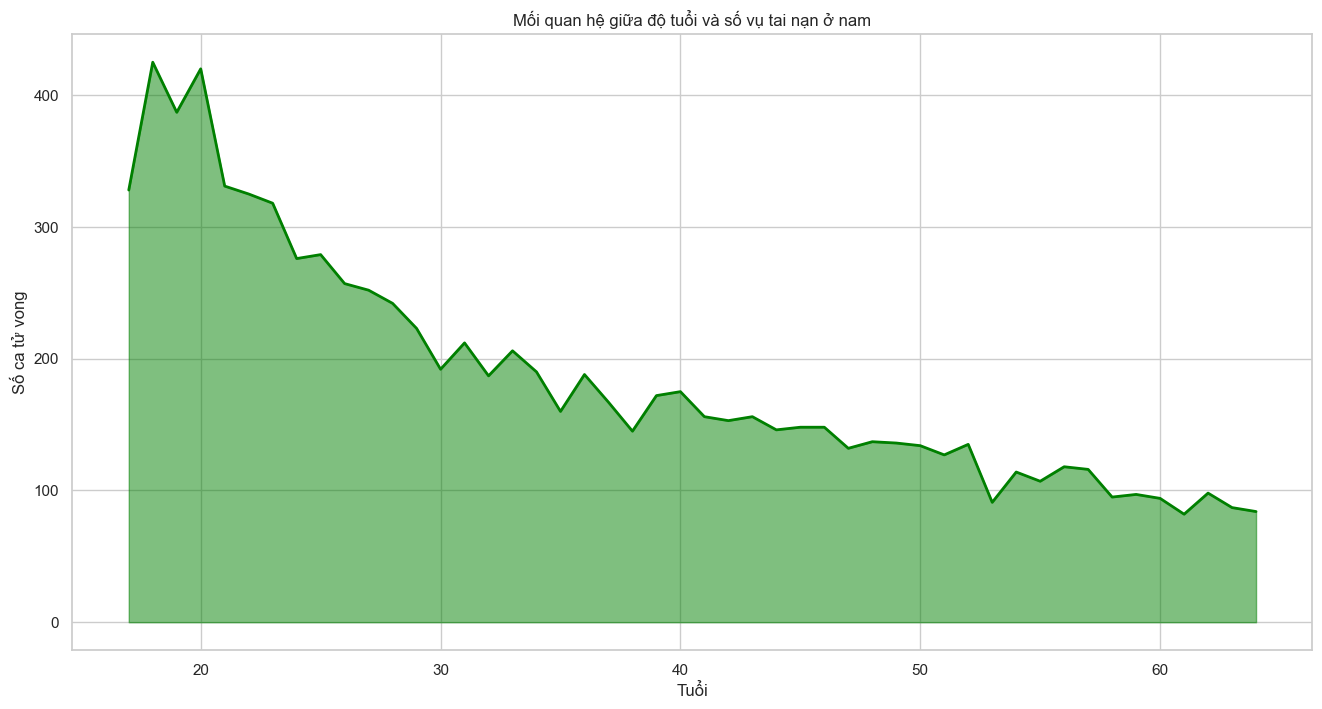

In [52]:
fig, ax = plt.subplots(figsize=(16,8))
# Lọc dữ liệu chỉ bao gồm độ tuổi từ 17 đến 64
df_filtered = df[(df['Age'] >= 17) & (df['Age'] <= 64) & (df['Gender'] == 'Male')]

# Đếm số vụ tai nạn theo độ tuổi
accident_count_by_age = df_filtered.groupby('Age')['Age'].count()
plt.fill_between(accident_count_by_age.index, accident_count_by_age, alpha=0.5, color='green')
plt.plot(accident_count_by_age.index, accident_count_by_age, color='green', linewidth=2)
plt.title('Mối quan hệ giữa độ tuổi và số vụ tai nạn ở nam')
plt.xlabel('Tuổi')
plt.ylabel('Số ca tử vong')
plt.show()

**Nhận xét**:
<br/>
- Ta có thể thấy rằng, tuổi càng cao thì số ca tử vong càng giảm, những người lớn tuổi có xu hướng ít ra ngoài hơn nên số vụ tai nạn giảm.
- Độ tuổi từ **18 đến 20** là độ tuổi có số ca tử vong cao nhất, có thể là do thiếu kinh nghiệm tham gia giao thông nên khi gặp những tình huống bất ngờ không xử lý kịp, hoặc có thể là do còn trẻ, suy nghĩ chưa chín chắn nên lái xe không tuân thủ quy định an toàn giao thông.
- Với độ tuổi **từ 30 trở lên** do đã có kinh nghiệm lái xe, suy nghĩ chín chắn và ý thức chấp hành an toàn giao thông nên số ca tư vong đã giảm đi đáng kể (giảm hơn một nửa) so với độ tuổi **từ 17 đến 20**

#### 2.3. Người tham gia giao thông (Road User) nào bị tai nạn giao thông nhiều hơn qua các năm?

a. Số ca tử vong theo loại người tham gia giao thông

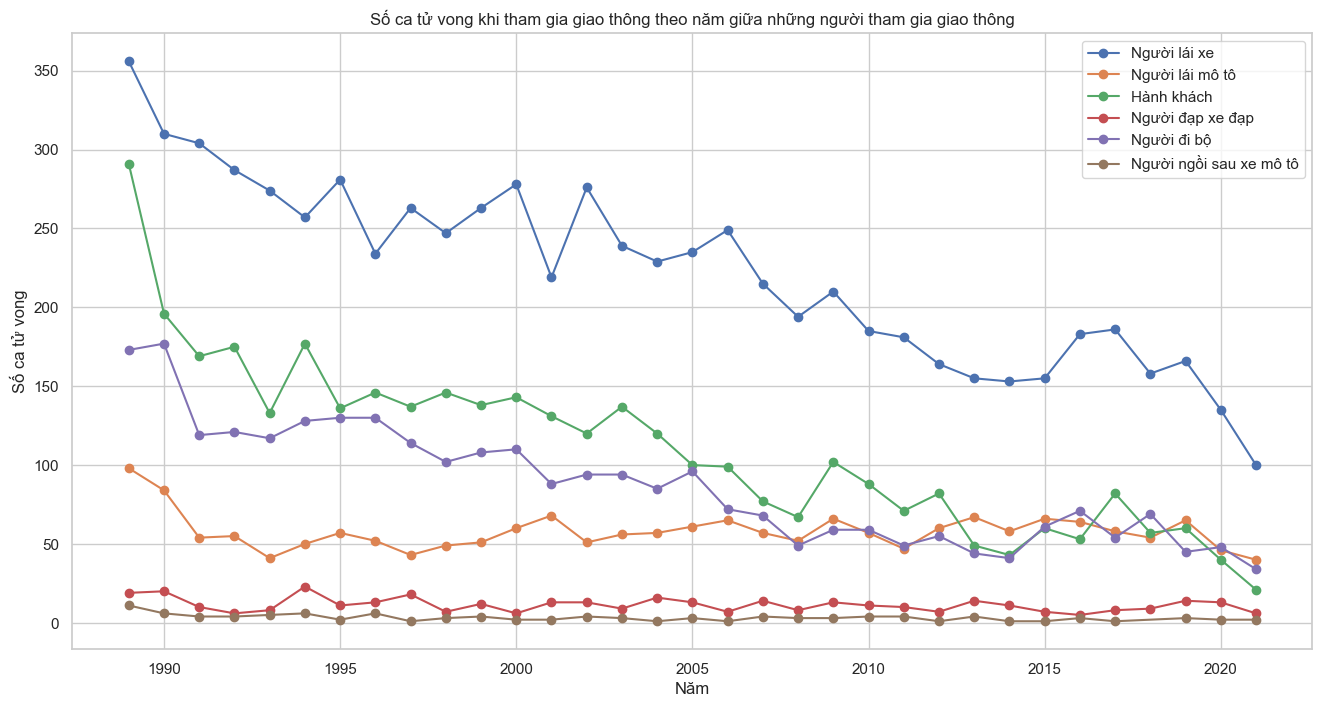

In [53]:
fig, ax = plt.subplots(figsize=(16,8))
df[df['Road User'] == 'Driver'].groupby('Year')['Crash ID'].count().plot(kind = 'line', marker = 'o', label='Người lái xe')
df[df['Road User'] == 'Motorcycle rider'].groupby('Year')['Crash ID'].count().plot(kind = 'line', marker = 'o',label='Người lái mô tô')
df[df['Road User'] == 'Passenger'].groupby('Year')['Crash ID'].count().plot(kind = 'line', marker = 'o',label='Hành khách')
df[df['Road User'] == 'Pedal cyclist'].groupby('Year')['Crash ID'].count().plot(kind = 'line', marker = 'o',label='Người đạp xe đạp')
df[df['Road User'] == 'Pedestrian'].groupby('Year')['Crash ID'].count().plot(kind = 'line', marker = 'o',label='Người đi bộ')
df[df['Road User'] == 'Motorcycle pillion passenger'].groupby('Year')['Crash ID'].count().plot(kind = 'line', marker = 'o',label='Người ngồi sau xe mô tô')
plt.title('Số ca tử vong khi tham gia giao thông theo năm giữa những người tham gia giao thông')
plt.legend()
plt.xlabel('Năm')
plt.ylabel('Số ca tử vong')
plt.show()

**Nhận xét**:
<br/>
- Ta có thể thấy sự khác biệt rõ rệt về số ca tử vong giữa những người tham gia giao thông.
- Những **Người lái xe** là nhóm có ca tử vong cao nhất và khác biệt nhất với những nhóm còn lại, với số ca tử vong gần như gấp đôi các nhóm khác qua từng năm.
- Tuy đang có xu hướng giảm nhưng **Người lái xe vẫn là nhóm** chiếm tỷ lệ cao nhất trong những người tham gia giao thông.
- Nhóm **Người đạp xe đạp** và **Người ngồi sau xe mô tô** là 2 nhóm có số ca tử vong thấp nhất, do **Người đạp xe đạp** thường đi với tốc độ chậm và có làn đi riêng, còn đối với người **Ngồi sau xe mô tô** thường sẽ có thời gian để xử lý hơn và an toàn hơn so với người lái

b. Số ca tử vong của nhóm tuổi **từ 17 đến 64** ở **nam** và là **người lái xe**

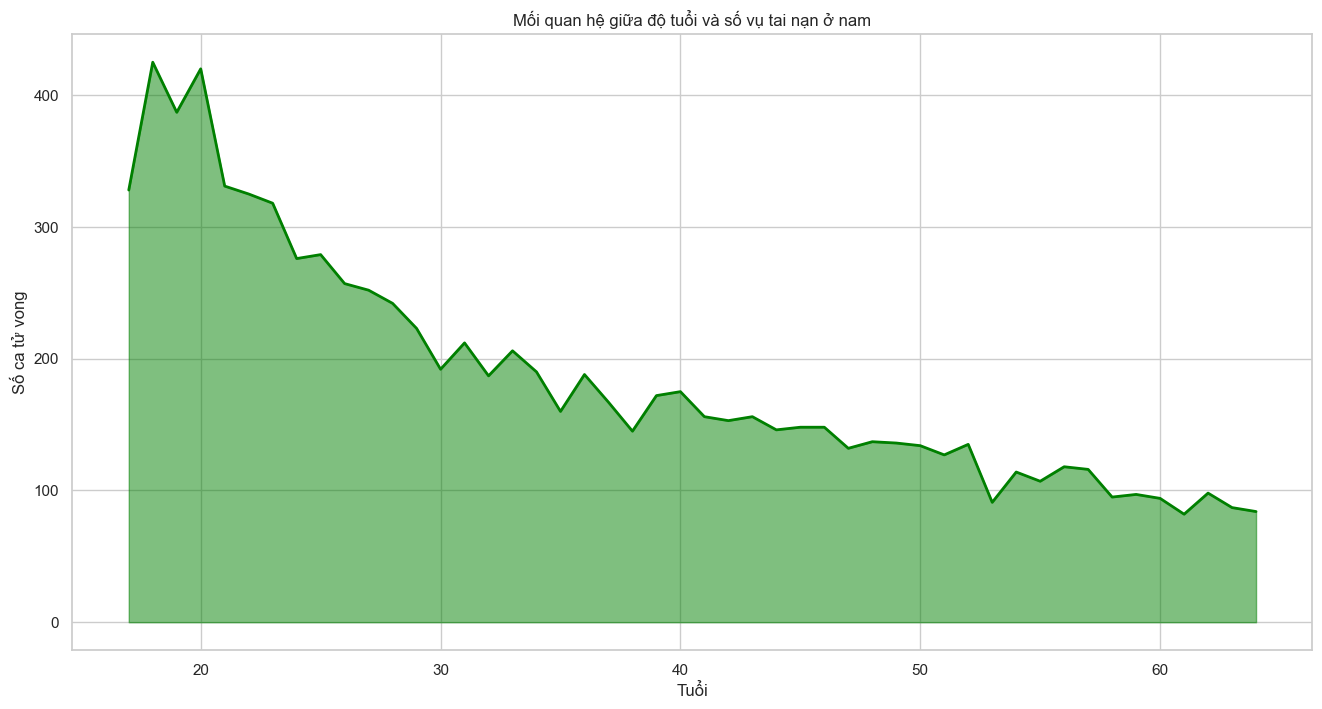

In [54]:
fig, ax = plt.subplots(figsize=(16,8))
# Lọc dữ liệu chỉ bao gồm độ tuổi từ 17 đến 64
df_relation = df[(df['Age'] >= 17) & (df['Age'] <= 64) & (df['Gender'] == 'Male')  & (df['Road User'] == 'Driver')]

# Đếm số vụ tai nạn theo độ tuổi
accident_count_by_age = df_filtered.groupby('Age')['Age'].count()
plt.fill_between(accident_count_by_age.index, accident_count_by_age, alpha=0.5, color='green')
plt.plot(accident_count_by_age.index, accident_count_by_age, color='green', linewidth=2)
plt.title('Mối quan hệ giữa độ tuổi và số vụ tai nạn ở nam')
plt.xlabel('Tuổi')
plt.ylabel('Số ca tử vong')
plt.show()

**Nhận xét**:
<br/>
- Ta có thể thấy hình dạng biểu đồ khá giống với biểu đồ ở mục 2.2b:
    - Những người lớn tuổi có xu hướng ít ra ngoài hơn nên số vụ tai nạn giảm.
    - Độ tuổi từ **18 đến 22** là độ tuổi có số ca tử vong cao nhất, có thể là do thiếu kinh nghiệm tham gia giao thông nên khi gặp những tình huống bất ngờ không xử lý kịp, hoặc có thể là do còn trẻ, suy nghĩ chưa chín chắn nên lái xe không tuân thủ quy định an toàn giao thông.
    - Với độ tuổi **từ 30 trở lên** do đã có kinh nghiệm lái xe, suy nghĩ chín chắn và ý thức chấp hành an toàn giao thông nên số ca tư vong đã giảm đi đáng kể (giảm hơn một nửa) so với độ tuổi **từ 18 đến 20**.

### 3. Kết luận:

- Đặc điểm của những ca tử vong:
    - **Giới tính**: Nam, với số ca tử vong luôn lớn hơn nữ qua các năm, hơn gấp 2 lần.
    - **Độ tuổi**: Từ 17 đến 64 tuổi
    - **Loại người tham gia giao thông**: Người lái xe(xe hơi, xe tải, ...), với số ca tử vong cao vượt trội so với những nhóm còn lại.
<br/>
- Qua những phân tích trên, ta cần rút ra kinh nghiệm đồng thời đưa ra những giải pháp phù hợp để nâng cao ý thức tham gia giao thông sao cho phù hợp với từng nhóm tuổi, giới tính và loại người tham gia giao thông, từ đó giảm thiểu số vụ tai nạn giao thông và số ca tử vong.

# E. Tài liệu tham khảo

- [Time Series Analysis: Definition, Types, Techniques, and When It's Used](https://www.tableau.com/learn/articles/time-series-analysis)
- [Time Series Analysis Introduction](https://statisticsbyjim.com/time-series/time-series-analysis-introduction/)
- [What is Time Series Analysis?](https://www.youtube.com/watch?v=GE3JOFwTWVM)
- [Why Are Time Series Special? : Time Series Talk](https://www.youtube.com/watch?v=ZoJ2OctrFLA&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3)
- [Time Series Analysis in Python | Time Series Forecasting | Data Science with Python | Edureka](https://www.youtube.com/watch?v=e8Yw4alG16Q)